### Importing Libraries

In [14]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import copy

### fetching dataframe

In [3]:
magicGammaMain = fetch_ucirepo(id=159)

### Creating copy of the dataframe

In [32]:
magicGamma = copy.deepcopy(magicGammaMain)

### encoding target values

In [33]:
mgdf = magicGamma.data.original
X = magicGamma.data.features
y = magicGamma.data.targets
mgdf["class"] = mgdf["class"].map(lambda x: 1 if x == "g" else 0)
y = y.map(lambda x: 1 if x == "g" else 0)

### Standardizing data

In [34]:
features_cols = mgdf.drop(columns=["class"]).columns
scaler = StandardScaler()
mgdf[features_cols] = scaler.fit_transform(mgdf[features_cols])
X[:] = scaler.transform(X)

### describing data

In [35]:
print("Features shape",X.shape)
print("Target shape",y.shape)
mgdf.describe()

Features shape (19020, 10)
Target shape (19020, 1)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,19020.000000,1.902000e+04,1.902000e+04,1.902000e+04,19020.000000
mean,7.172671e-17,-1.314990e-16,-2.211574e-16,1.494306e-18,1.102051e-16,-1.195445e-17,0.000000,-8.405474e-18,4.781781e-17,-1.195445e-17,0.648370
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026,1.000026e+00,1.000026e+00,1.000026e+00,0.477492
min,-1.155862e+00,-1.209064e+00,-1.869959e+00,-2.008809e+00,-1.939745e+00,-7.661315e+00,-6.712427,-9.897993e+00,-1.059103e+00,-2.576420e+00,0.000000
25%,-6.825213e-01,-5.623790e-01,-7.361978e-01,-7.905934e-01,-7.798731e-01,-2.745535e-01,-0.458606,-5.329216e-01,-8.465631e-01,-6.868179e-01,0.000000
50%,-3.800999e-01,-2.747838e-01,-1.807437e-01,-1.431941e-01,-1.643062e-01,1.409487e-01,0.093503,1.999694e-02,-3.818041e-01,-2.631582e-02,1.000000
75%,3.982656e-01,1.394619e-01,5.852541e-01,6.748758e-01,6.385776e-01,4.796163e-01,0.495938,5.136004e-01,6.986894e-01,6.255307e-01,1.000000
max,6.631304e+00,1.276608e+01,5.286407e+00,2.804429e+00,4.167511e+00,9.789330e+00,4.466292,8.623528e+00,2.388785e+00,4.037785e+00,1.000000


In [36]:
mgdf

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,1
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,1
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,1
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,1
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,-0.752189,-0.613988,-0.442072,1.123433,1.617467,0.330947,0.019196,0.126129,-0.966282,-1.164090,0
19016,-0.573721,-0.843744,-1.180350,0.846640,0.576817,0.699497,0.051761,-0.154268,2.266097,0.717759,0
19017,0.523923,1.381779,1.318877,-1.305340,-1.445663,-0.084864,0.598262,-0.466509,0.101636,0.839003,0
19018,1.587757,2.982781,2.473375,-1.564081,-1.324404,0.171204,-2.040597,-3.077206,2.185260,2.870321,0


### Plotting hisplot of features

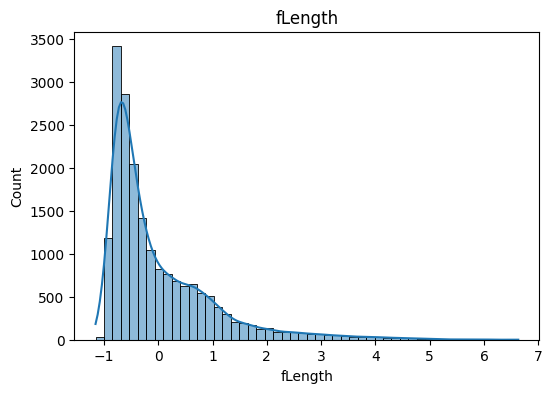

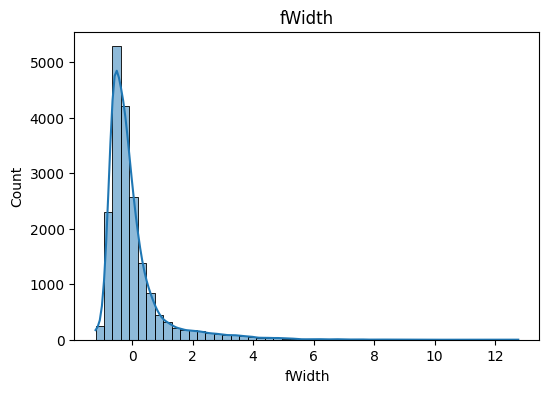

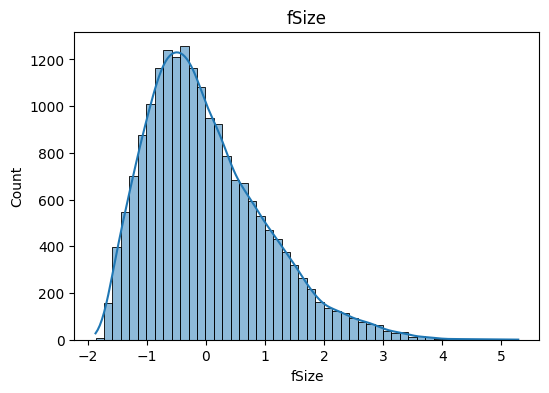

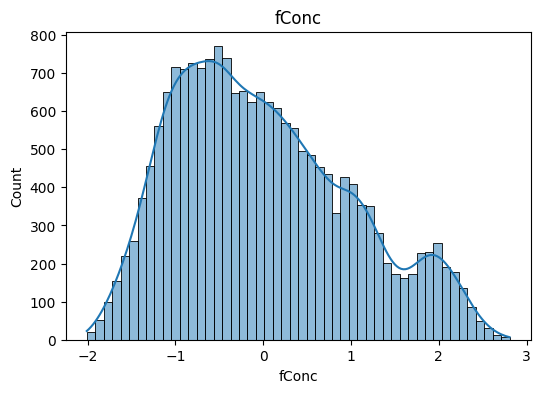

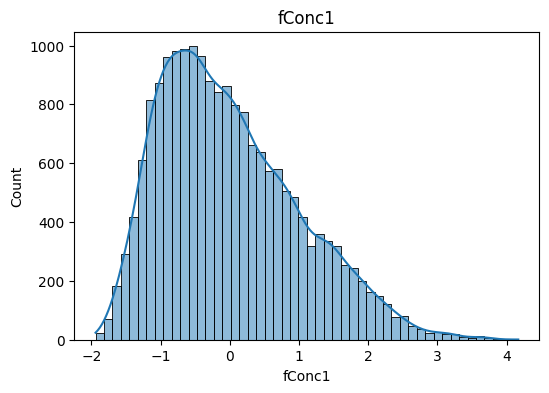

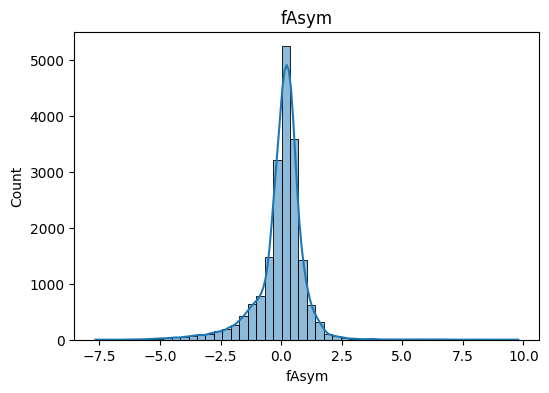

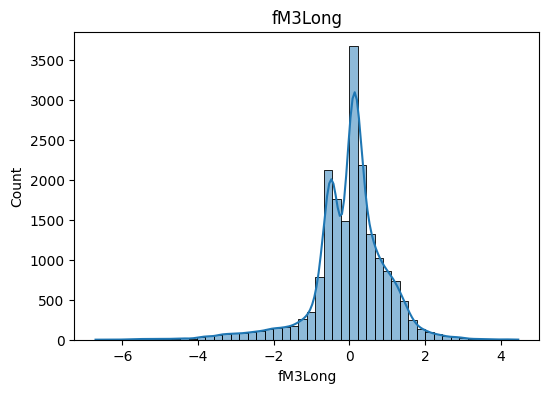

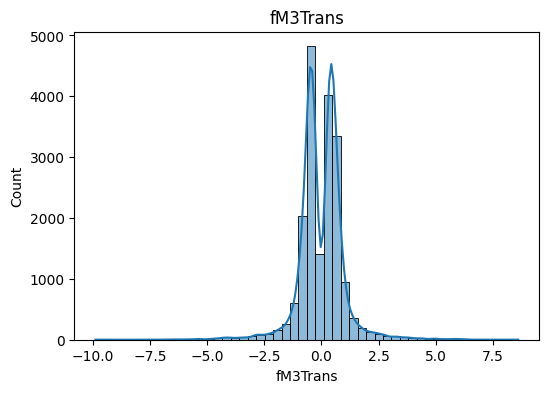

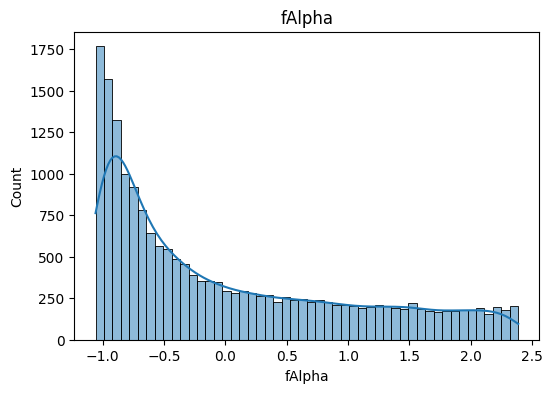

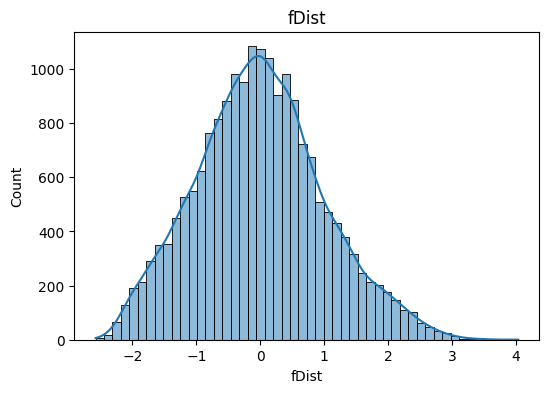

In [37]:
for col in features_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(mgdf[col], bins=50, kde=True)
    plt.title(col)
    plt.show()

### finding correlation between features and target values

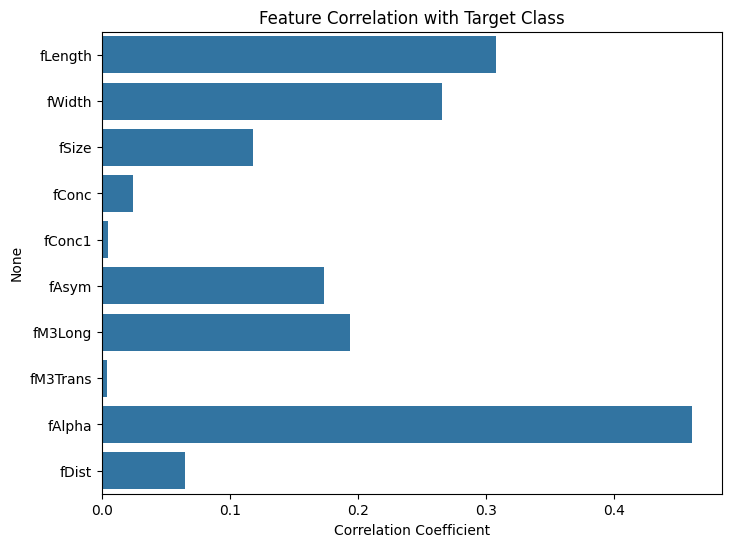

In [38]:
corr = mgdf.corr(numeric_only=True)["class"].abs()
corr = corr.drop("class")

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Feature Correlation with Target Class")
plt.xlabel("Correlation Coefficient")
plt.show()

### selecting features which have higher correlation that `>=0.02`

In [39]:
selected_features = corr[corr >= 0.02].index.tolist()

print(f"Using {len(selected_features)} features:")
print(selected_features)

X = X[selected_features]
mgdf = mgdf[selected_features + ["class"]]

Using 8 features:
['fLength', 'fWidth', 'fSize', 'fConc', 'fAsym', 'fM3Long', 'fAlpha', 'fDist']


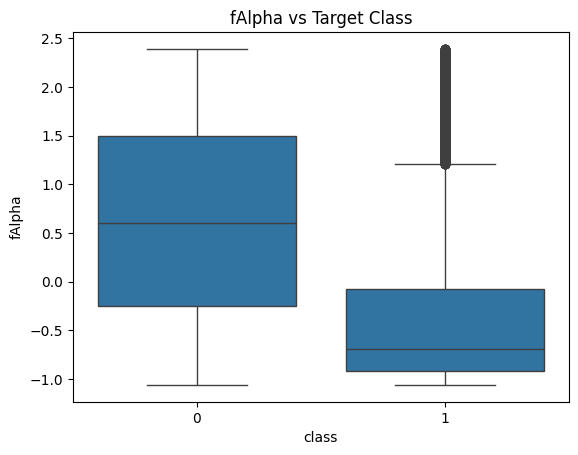

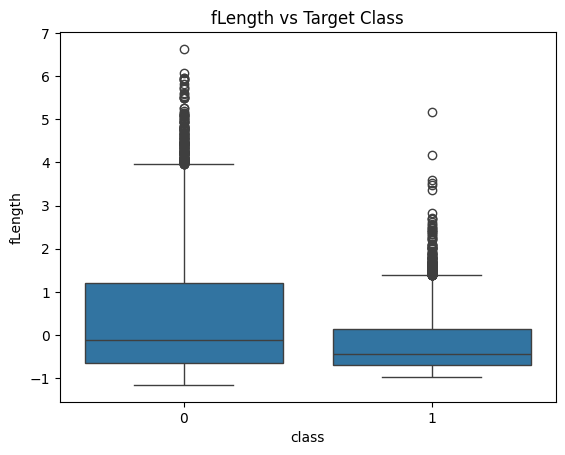

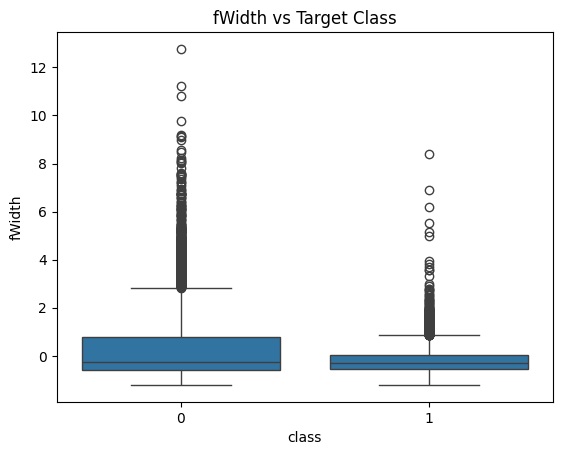

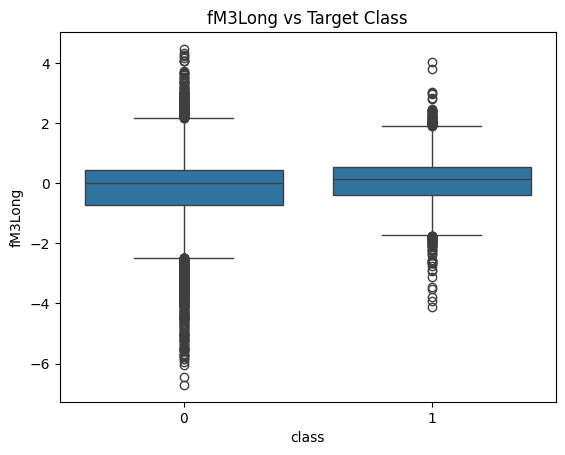

In [40]:
top_features = corr[selected_features].sort_values(ascending=False).head(4).index

for tf in top_features:
    sns.boxplot(x=y["class"], y=X[tf])
    plt.title(f"{tf} vs Target Class")
    plt.show()

### showing class distribution in original data

class
1        12332
0         6688
Name: count, dtype: int64


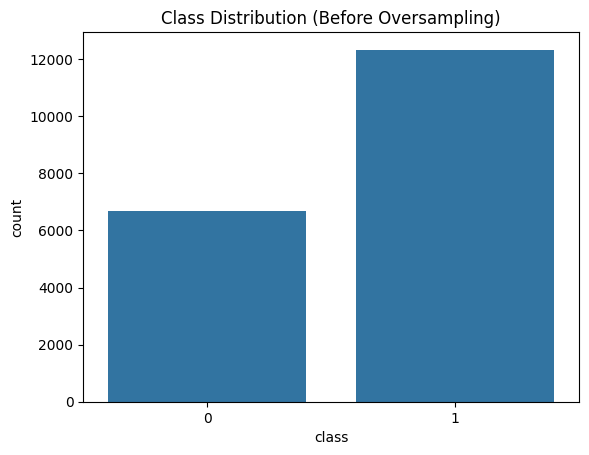

In [41]:
print(y.value_counts())

sns.countplot(x=y["class"])
plt.title("Class Distribution (Before Oversampling)")
plt.show()


### Random oversampling data 

In [42]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y["class"])

class
1    12332
0    12332
Name: count, dtype: int64


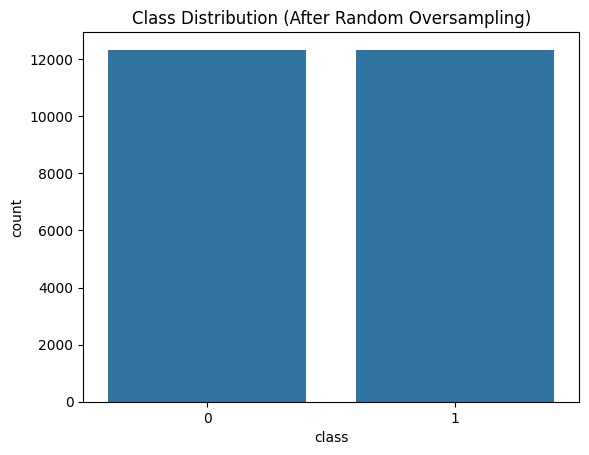

In [43]:
print(pd.Series(y_resampled).value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution (After Random Oversampling)")
plt.show()

### showing correlation

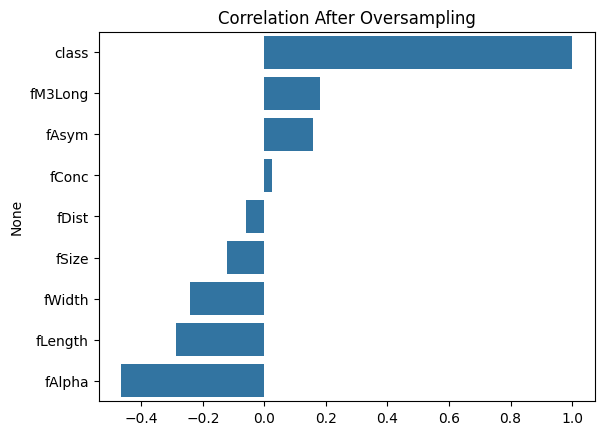

In [44]:
df_resampled = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name="class")
], axis=1)

corr_resampled = df_resampled.corr()["class"].sort_values(ascending=False)

sns.barplot(x=corr_resampled.values, y=corr_resampled.index)
plt.title("Correlation After Oversampling")
plt.show()
